In [86]:
import pandas as pd
import numpy as np
import pickle
from pandas import ExcelWriter
import ffn
%matplotlib inline

def save_xls(list_dfs, xls_path,sheet_names):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer, sheet_names[n])
    writer.save()
    return

#pull in data from AlphaVantage
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='NXY0VT9AHBRYGKKC',output_format='pandas')



In [87]:
def historical_data(ticker, outsize = "full"):
    #outsize can be compact and full. 
    #compact returns only the latest 100 data points; full 
    #returns the full-length time series of up to 20 years of historical data. The "compact" option is 
    #recommended if you would like to reduce the data size of each API call
    alphavantage_link = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={0}&apikey=NXY0VT9AHBRYGKKC&datatype=csv&outputsize={1}'.format(ticker, outsize)
    df = pd.read_csv(alphavantage_link)
    df.index = pd.to_datetime(df.timestamp)
    df = df[['adjusted_close']]
    df.columns = [ticker]
    df.dropna(inplace = True)
    return df


def multiple_tickers(tickers, df):
    for ticker in tickers:
        temp_df = historical_data(ticker)
        df = df.join(temp_df, how = "left")
        df.dropna(inplace = True)
        df = df.sort_index()
    df = df.loc[~(df==0).all(axis=1)]
    return df

In [96]:
SPY = historical_data("CM.TO")
banks = multiple_tickers(["BMO.TO","RY.TO","ZPR.TO"],SPY)
perf = banks.calc_stats()

C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:1043: RuntimeWarning: divide by zero encountered in log
  return np.log(prices / prices.shift(1))
C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)
C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [97]:
perf.display()

Stat                 CM.TO       BMO.TO      RY.TO       ZPR.TO
-------------------  ----------  ----------  ----------  ----------
Start                2012-11-26  2012-11-26  2012-11-26  2012-11-26
End                  2018-07-10  2018-07-10  2018-07-10  2018-07-10
Risk-free rate       0.00%       0.00%       0.00%       0.00%

Total Return         92.48%      124.24%     118.28%     0.31%
Daily Sharpe         -           -           -           0.05
Daily Sortino        inf         inf         inf         0.09
CAGR                 12.36%      15.46%      14.91%      0.06%
Max Drawdown         -100.00%    -100.00%    -100.00%    -37.00%
Calmar Ratio         0.12        0.15        0.15        0.00

MTD                  1.33%       1.21%       2.34%       0.34%
3m                   3.51%       7.85%       4.33%       1.70%
6m                   -4.76%      2.16%       -0.91%      -0.49%
YTD                  -4.32%      4.20%       1.37%       0.86%
1Y                   13.02%      11.4

In [90]:
perf['RY.TO'].display_monthly_returns()

  Year     Jan    Feb    Mar    Apr     May     Jun    Jul    Aug    Sep    Oct    Nov     Dec     YTD
------  ------  -----  -----  -----  ------  ------  -----  -----  -----  -----  -----  ------  ------
  2000   -0.69   5.42   9.24   5.95   11.37   -2.7    8.04   8.64   3.77   9.64  -5.49   11.39   84.6
  2001   -3.95  -2.8    0.7   -7.6    13.95   -0.76   6.42  -2.65  -2.94  -1.31   5.21    5.26    7.98
  2002   -2.13   1.42   4.91   4.73    6.8   -10.41   3.39   4.77  -5.89   4.71   7.61   -1.2    18.41
  2003   -3.07   5.06  -1.65   4.66   -1.52   -2.56   4.52   0.83  -0.24   8.31  -2.8     0.16   11.51
  2004    3.76   0.41  -1.42  -0.94   -3.1     0.12   5.8   -3.38   0.89   7.54  -1.58    2.96   10.94
  2005   -0.05  14.5    1.81   3.42    0.07    1.2    3.57   4.33   4.88  -0.07   6.83    2.01   50.59
  2006   -0.5    6.61   3.69  -2.09   -5.94    0.71   2.35   6.41   1.08   1.4    6.99    4.17   26.93
  2007   -0.9   -0.93   6.3    1.33    0.8    -2.85  -3.7    0.46   1.31  

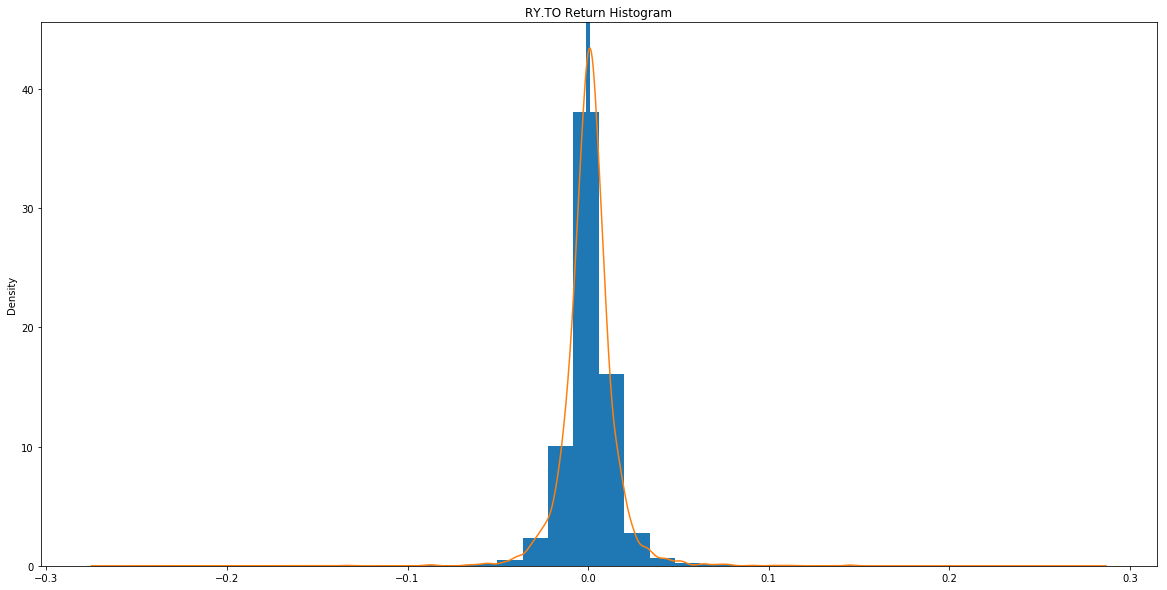

In [91]:
perf[2].plot_histogram(figsize = (20,10))

In [92]:
perf[2].stats

start                    2000-01-04 00:00:00
end                      2018-07-10 00:00:00
rf                                         0
total_return                         15.1499
cagr                                0.162143
max_drawdown                        -0.54028
calmar                              0.300109
mtd                                0.0234367
three_month                        0.0432574
six_month                        -0.00905554
ytd                                0.0137265
one_year                            0.116627
three_year                          0.144803
five_year                           0.151544
ten_year                            0.133119
incep                               0.162143
daily_sharpe                        0.790518
daily_sortino                        1.33982
daily_mean                          0.175185
daily_vol                           0.221609
daily_skew                          0.542954
daily_kurt                           12.3112
best_day  

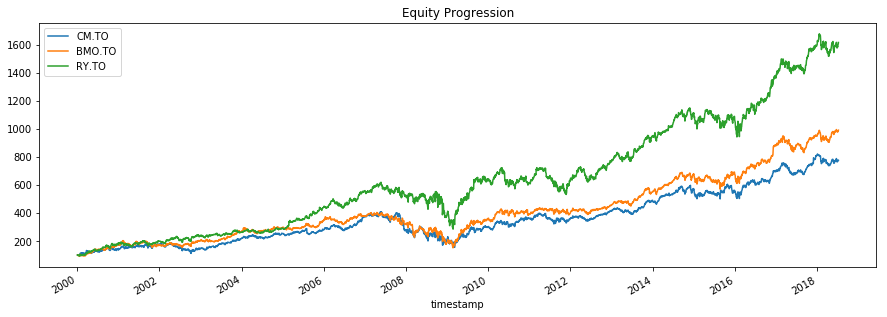

In [93]:
perf.plot()

In [99]:
returns = banks.to_log_returns().dropna()

C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:1043: RuntimeWarning: divide by zero encountered in log
  return np.log(prices / prices.shift(1))


<module 'matplotlib.pyplot' from 'C:\\Users\\scheng\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

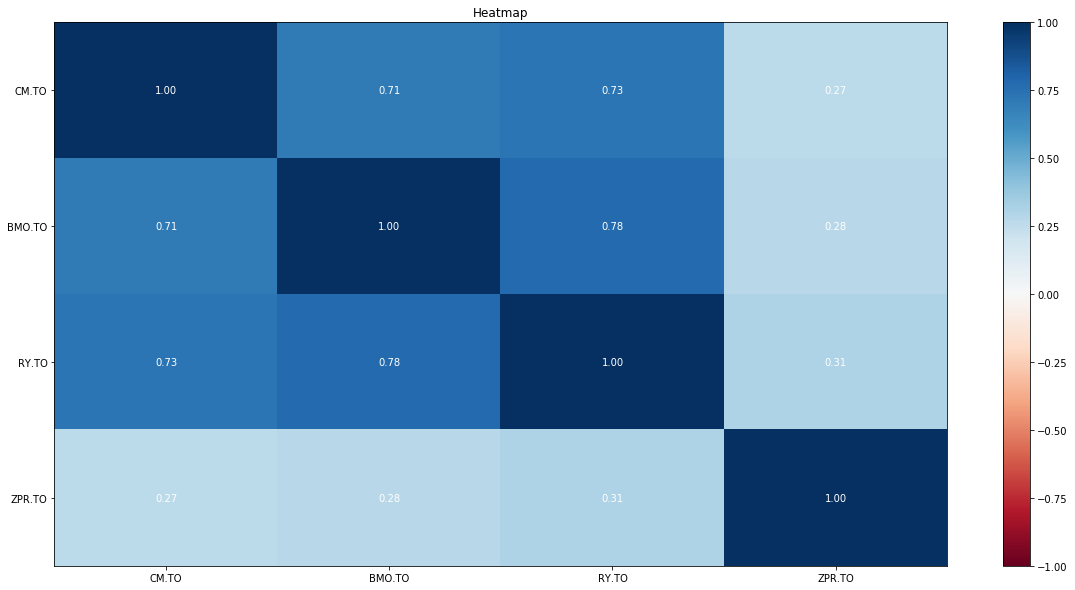

In [100]:
returns.plot_corr_heatmap(figsize=(20,10))

In [101]:
def historical_data1(ticker, outsize = "full"):
    #outsize can be compact and full. 
    #compact returns only the latest 100 data points; full 
    #returns the full-length time series of up to 20 years of historical data. The "compact" option is 
    #recommended if you would like to reduce the data size of each API call
    alphavantage_link = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={0}&apikey=NXY0VT9AHBRYGKKC&datatype=csv&outputsize={1}'.format(ticker, outsize)
    df = pd.read_csv(alphavantage_link)
    df.index = pd.to_datetime(df.timestamp)
    df.dropna(inplace = True)
    return df

In [115]:
ZPR = historical_data1("ZPR.TO")
CPD = historical_data1("CPD.TO")

In [117]:
ZPR.adjusted_close.calc_stats().display()

Stats for adjusted_close from 2018-07-10 00:00:00 - 2012-11-26 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return      Sharpe  CAGR    Max Drawdown
--------------  --------  ------  --------------
-0.31%              0.05  0.06%   -37.00%

Annualized Returns:
mtd    3m     6m      ytd    1y     3y     5y     10y    incep.
-----  -----  ------  -----  -----  -----  -----  -----  --------
0.34%  1.70%  -0.49%  0.86%  5.25%  5.12%  0.04%  0.06%  0.06%

Periodic:
        daily    monthly    yearly
------  -------  ---------  --------
sharpe  0.05     0.06       0.05
mean    0.50%    0.70%      0.57%
vol     9.49%    11.02%     11.78%
skew    0.67     -1.00      -1.09
kurt    12.47    6.20       1.91
best    4.73%    10.16%     14.55%
worst   -3.48%   -13.98%    -20.16%

Drawdowns:
max      avg       # days
-------  ------  --------
-37.00%  -2.81%    141.79

Misc:
---------------  ------
avg. up month    1.82%
avg. down month  -2.31%
up year %        66.67%
12m up %    

C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)


In [118]:
CPD.adjusted_close.calc_stats().display()

Stats for adjusted_close from 2018-07-11 00:00:00 - 2007-10-25 00:00:00
Annual risk-free rate considered: 0.00%
Summary:
Total Return    Sharpe    CAGR    Max Drawdown
--------------  --------  ------  --------------
-23.02%         -         2.47%   -100.00%

Annualized Returns:
mtd    3m     6m     ytd    1y     3y     5y     10y    incep.
-----  -----  -----  -----  -----  -----  -----  -----  --------
0.57%  1.69%  0.02%  0.78%  5.09%  5.17%  1.46%  3.39%  2.47%

Periodic:
        daily     monthly    yearly
------  --------  ---------  --------
sharpe  -         0.33       0.25
mean    inf%      2.92%      3.01%
vol     -         8.89%      11.84%
skew    -         -0.75      -0.22
kurt    -         5.08       0.53
best    inf%      8.98%      24.60%
worst   -100.00%  -10.78%    -16.79%

Drawdowns:
max       avg       # days
--------  ------  --------
-100.00%  -2.09%      35.9

Misc:
---------------  ------
avg. up month    1.57%
avg. down month  -1.86%
up year %        72.73%
12

C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:1043: RuntimeWarning: divide by zero encountered in log
  return np.log(prices / prices.shift(1))
C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)
